# Телекоммуникаци #

Оператор связи **«ТелеДом»** хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. 

**Задача** — обучить на этих данных модель для прогноза оттока клиентов.

# Описание услуг #
Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Другие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Описание данных #
1. Файл **contract_new.csv — информация о договоре**;
- customerID — идентификатор абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

2. Файл **personal_new.csv — персональные данные клиента**;
- customerID — идентификатор пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

3. Файл **internet_new.csv — информация об интернет-услугах**;
- customerID — идентификатор пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

4. Файл **phone_new.csv — информация об услугах телефонии**.
- customerID — идентификатор пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

*Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.*

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных объединённого датафрейма</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей-машинного-обучения" data-toc-modified-id="Обучение-моделей-машинного-обучения-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей машинного обучения</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Общий-вывод-и-рекомендации-заказчику" data-toc-modified-id="Общий-вывод-и-рекомендации-заказчику-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод и рекомендации заказчику</a></span></li></ul></div>

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
!pip install phik -q
import phik

sns.set(style="whitegrid")  # общий стиль графиков

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, classification_report

## Загрузка данных ##


In [2]:
# Файл с информацией о договоре;
try:
    contract = pd.read_csv('contract_new.csv')
except:
    contract = pd.read_csv('/datasets/contract_new.csv')
print('contract')
display(contract.head())    
    
# Файл c персональными данными клиента;
try:
    personal = pd.read_csv('personal_new.csv')
except:
    personal = pd.read_csv('/datasets/personal_new.csv')
print('personal')
display(personal.head())  

# Файл с информацией об интернет-услугах;
try:
    internet = pd.read_csv('internet_new.csv')
except:
    internet = pd.read_csv('/datasets/internet_new.csv')
print('internet')
display(internet.head())  

# Файл с информацией об услугах телефонии.
try:
    phone = pd.read_csv('phone_new.csv')
except:
    phone = pd.read_csv('/datasets/phone_new.csv')
print('phone')
display(phone.head()) 

contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [3]:
# Общая информация о таблицах
print('contract')
display(contract.info())    
print('personal')
display(personal.info())  
print('internet')
display(internet.info())  
print('phone')
display(phone.info()) 

contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

personal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

phone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

**Выводы**

На первом этапе были загруженные файлы с информацией о договоре, персональными данных клиента, какими интернет услугами пользуется клиент и услугами телефнии. При просмотре общей информации о датафреймах обнаружили, что некоторые признаки имеют тип object, хотя содержат числа или даты. Это скорректируем на следующем шаге. Также наблюдается, что в разных таблицах разное количество данных, что можно объяснить тем, что некоторые пользователи пользуются только интернет услугами, а некоторые только услугами телефонии.

## Исследовательский анализ и предобработка данных ##
Выполните исследовательский анализ каждого датафрейма и при необходимости выполните предобработку. Сделайте выводы об имеющихся признаках: понадобятся ли они для обучения моделей.


In [4]:
# преобразуем наименование признаков в змеиный регистр
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def convert_columns_to_snake_case(df):
    new_columns = [to_snake_case(col) for col in df.columns]
    df.columns = new_columns
    return df

# Применяем функцию ко всем таблицам
contract = convert_columns_to_snake_case(contract)
personal = convert_columns_to_snake_case(personal)
internet = convert_columns_to_snake_case(internet)
phone = convert_columns_to_snake_case(phone)

In [5]:
# Проверяем данные на наличие пропусков
print("Пропуски в contract:")
display(contract.isna().sum())
print("Пропуски в personal:")
display(personal.isna().sum())
print("Пропуски в internet:")
display(internet.isna().sum())
print("Пропуски в phone:")
display(phone.isna().sum())

Пропуски в contract:


customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

Пропуски в personal:


customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

Пропуски в internet:


customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

Пропуски в phone:


customer_id       0
multiple_lines    0
dtype: int64

In [6]:
# Проверяем данные на наличие дубликатов
print("Дубликаты:")
print("contract:", contract.duplicated().sum())
print("personal:", personal.duplicated().sum())
print("internet:", internet.duplicated().sum())
print("phone:", phone.duplicated().sum())

Дубликаты:
contract: 0
personal: 0
internet: 0
phone: 0


In [7]:
# Проверяем категориальные признаки на предмет ошибок
print(contract['type'].unique())
print(contract['paperless_billing'].unique())
print(contract['payment_method'].unique())
print(personal['gender'].unique())
print(internet['internet_service'].unique())
print(phone['multiple_lines'].unique())

['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Female' 'Male']
['DSL' 'Fiber optic']
['No' 'Yes']


In [8]:
contract[contract['total_charges'] == ' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [9]:
# удалим пустые значения признака
contract = contract[contract['total_charges'] != ' ']

In [10]:
# Создаём целевой признак: target = 1 (ушёл), 0 (остался)
contract['target'] = (contract['end_date'] != 'No').astype(int)

In [11]:
# Корректировка типов данных
contract['total_charges'] = contract['total_charges'].astype(float)
contract['begin_date'] = pd.to_datetime(contract['begin_date'], errors = 'coerce')
contract['end_date'] = contract['end_date'].replace('No', np.nan)
contract['end_date'] = pd.to_datetime(contract['end_date'], errors = 'coerce')

personal['senior_citizen'] = personal['senior_citizen'].astype('int64')

In [12]:
# Заполняем пропуски в end_date
contract['end_date'] = contract['end_date'].fillna(pd.Timestamp('2020-02-01'))

# Считаем длительность контракта в днях
contract['contract_duration'] = ((contract['end_date'] - contract['begin_date']).dt.days)

**Выводы**

Предоставленные данные не содержат пропусков и дубликатов. Был преобразован стиль наименования признаков в змеиный регистр, также скорректированы признаки в датафрейме contract, total_charges с типа данных object был преобразован в вещественный тип данных, также признаки с датами начала и окончания действия договора были преобразованы в типы данных дата.

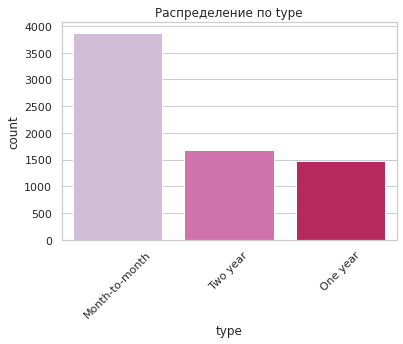

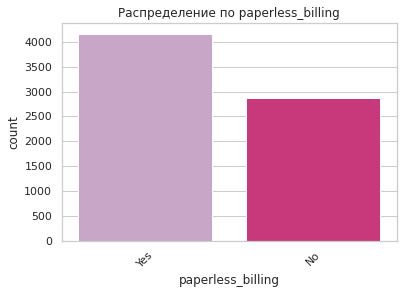

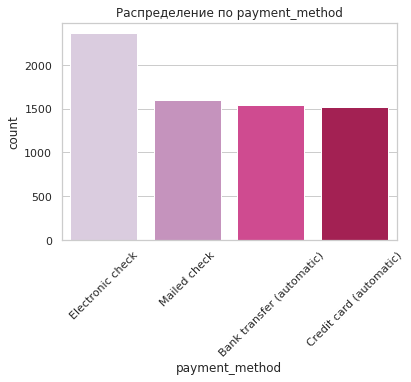

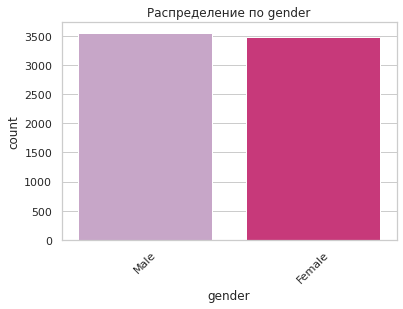

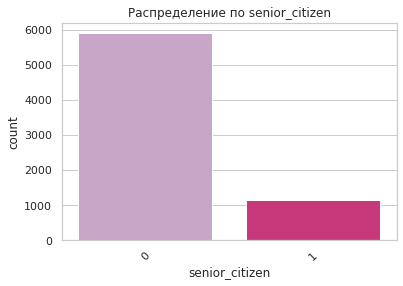

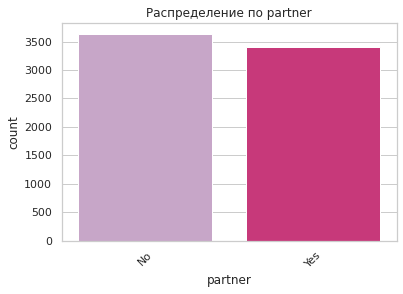

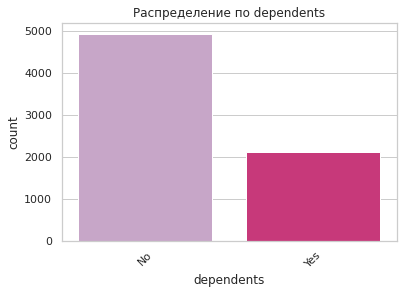

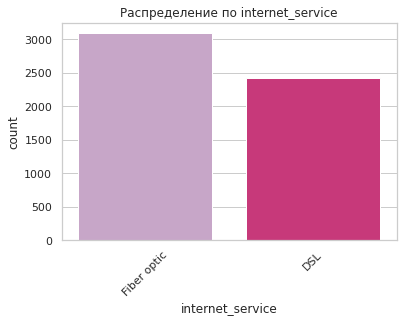

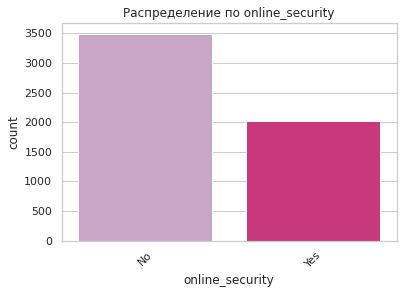

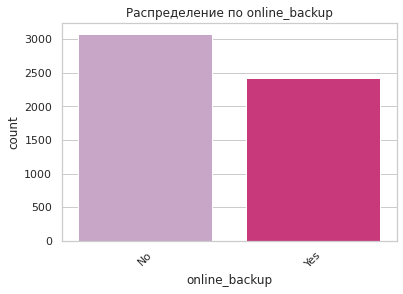

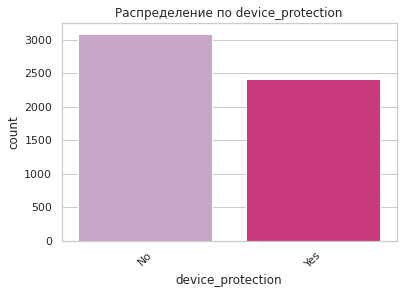

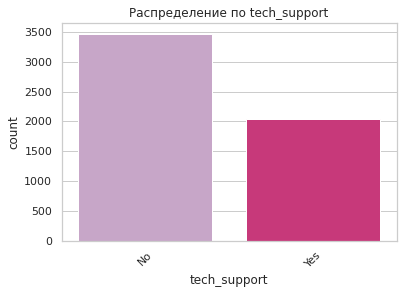

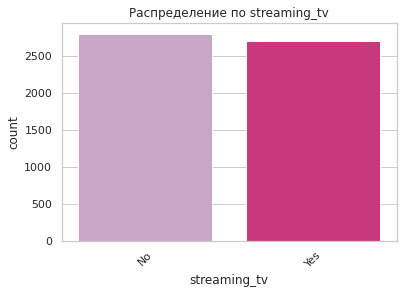

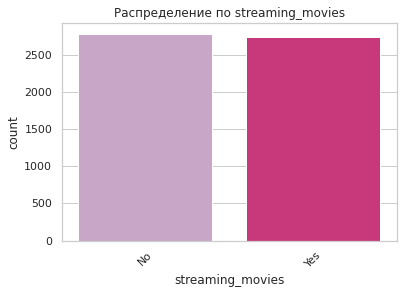

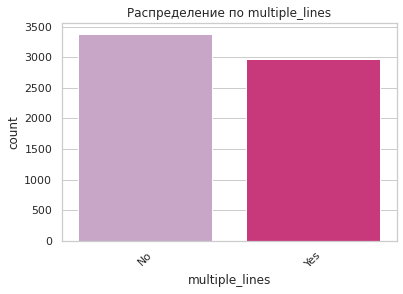

In [13]:
# Функция для визуализации категориальных признаков
def plot_categorical_distribution(df, col, title=None):
    plt.figure(figsize=(6,4))
    palette = sns.color_palette("PuRd", n_colors=df[col].nunique())
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=palette)
    plt.title(title if title else col)
    plt.xticks(rotation=45)
    plt.show()

# Contract
for col in ['type', 'paperless_billing', 'payment_method']:
    plot_categorical_distribution(contract, col, f'Распределение по {col}')

# Personal
for col in ['gender', 'senior_citizen', 'partner', 'dependents']:
    plot_categorical_distribution(personal, col, f'Распределение по {col}')

# Internet
for col in ['internet_service', 'online_security', 'online_backup',
            'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']:
    plot_categorical_distribution(internet, col, f'Распределение по {col}')

# Phone
plot_categorical_distribution(phone, 'multiple_lines', 'Распределение по multiple_lines')


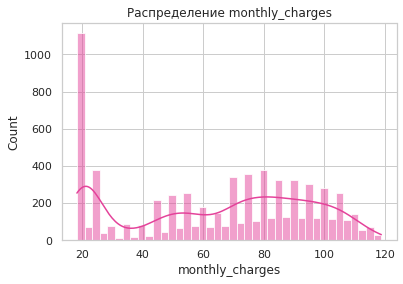

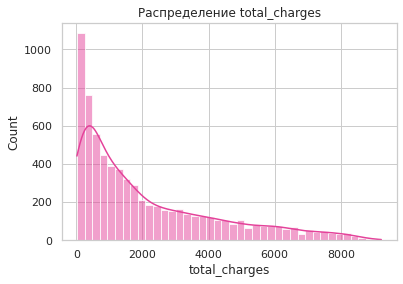

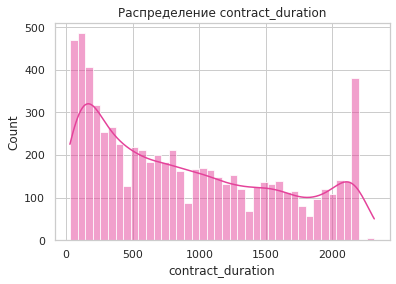

In [14]:
numeric_cols = ['monthly_charges', 'total_charges', 'contract_duration']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(contract[col], bins=40, kde=True, color=sns.color_palette("PuRd")[3])
    plt.title(f'Распределение {col}')
    plt.show()

**Выводы**

На основании проведенного анализа категориальных признаков были сделаны следующие заключения:

- 55% клиентов заключают помесячные контракты.
- 34% используют электронный чек, ~22% — автоплатеж.
- Пол клиентов распределен равномерно.
- 16% пользователей — пенсионеры.
- 44% используют DSL, 56% — оптоволокно.
- Услуги (TV, фильмы, защита, поддержка) активированы примерно у 35–50% пользователей.
- 47% имеют несколько телефонных линий.

Анализ числовых признаков показал следующее:

- Два основных тарифных плана: бюджетный (~20) и более дорогой (70-100).
- Большинство клиентов платят мало, многие - недавно присоединились
- Многие клиенты уходят в первые пол года после заключения контракта, но также значительная часть клиентов, пользуются услугами компании более 5 лет.

## Объединение данных ##
Объедините выбранные вами признаки в один датафрейм по ключу.

In [15]:
# объединяем таблицы
df = contract.merge(personal, on='customer_id', how='left') \
             .merge(internet, on='customer_id', how='left') \
             .merge(phone, on='customer_id', how='left')

print("Размер итогового датафрейма:", df.shape)

Размер итогового датафрейма: (7032, 22)


**Выводы**

Все таблицы объединены по 'customer_id', после повторного исследовательского анализа, можно будет сделать выводы об использовании конкретных признаков для обучения модели.

## Исследовательский анализ и предобработка данных объединённого датафрейма ##
Выполните исследовательский анализ объединённого датафрейма, визуализируйте распределения признаков и при необходимости выполните предобработку. Проведите корреляционный анализ. Напоминаем, что вы можете использовать не только имеющиеся признаки, но и генерировать новые.


In [16]:
contract.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
target               0
contract_duration    0
dtype: int64

In [17]:
# Заполняем пропуски в категориальных колонках
fill_cols = [
    'multiple_lines', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support',
    'streaming_tv', 'streaming_movies'
]
for col in fill_cols:
    df[col] = df[col].fillna('Not use')
    

0    5931
1    1101
Name: target, dtype: int64
Доля оттока: 15.66%


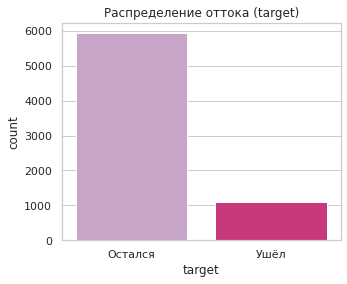

In [18]:
# Удаляем технические признаки
df = df.drop(columns=['begin_date', 'end_date'])

# Проверим баланс классов
print(df['target'].value_counts())
print(f"Доля оттока: {df['target'].mean():.2%}")

plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df, palette='PuRd')
plt.title("Распределение оттока (target)")
plt.xticks([0,1], ['Остался', 'Ушёл'])
plt.show()

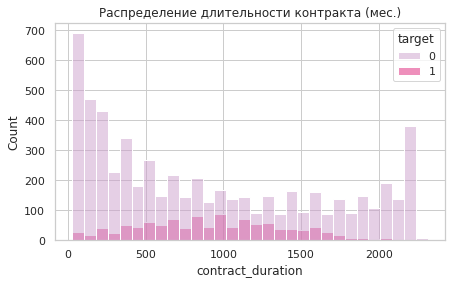

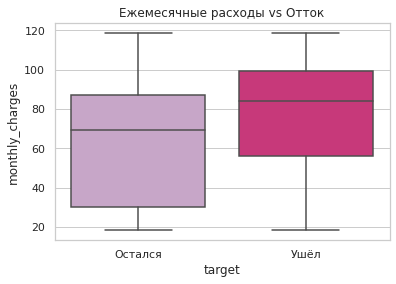

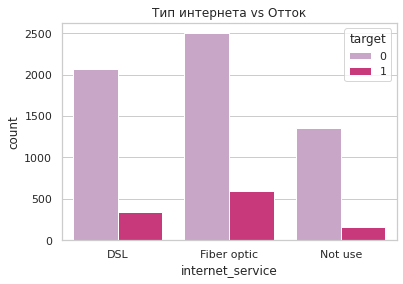

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable customer_id is large: 7032. Are you sure this is not an interval variable? Analysis for pairs of variables including customer_id can be slow.
  warnings.warn(


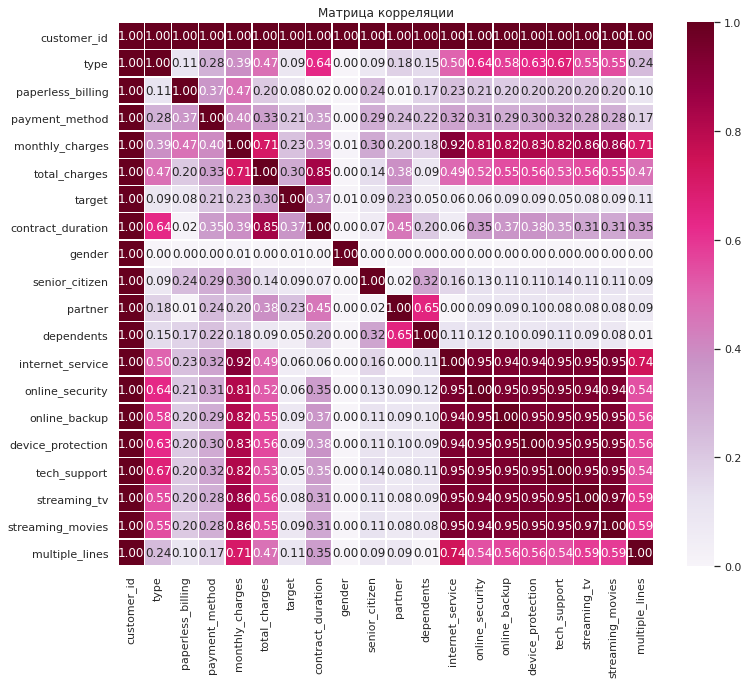

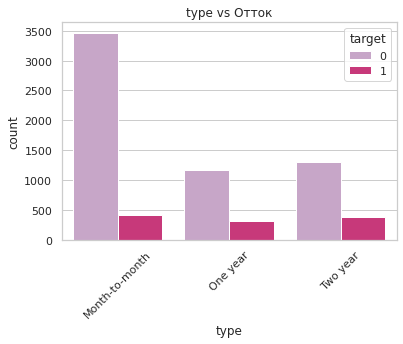

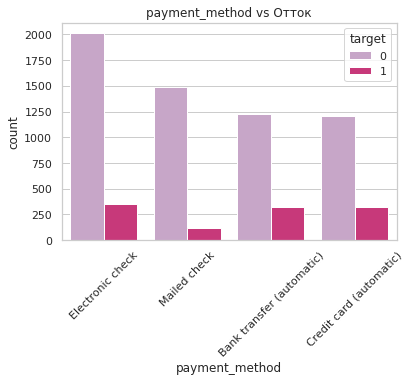

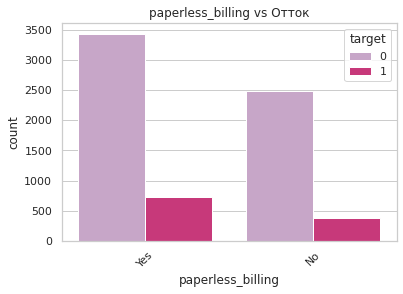

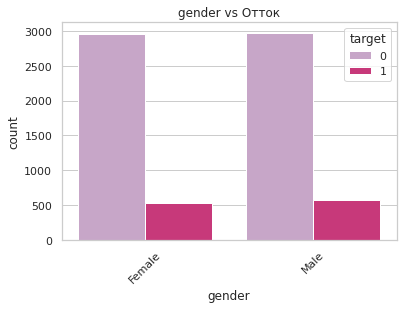

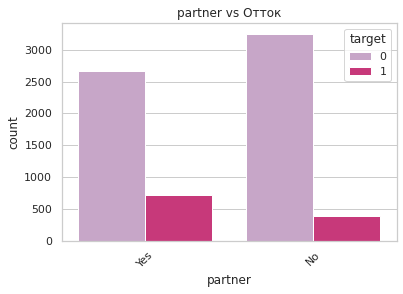

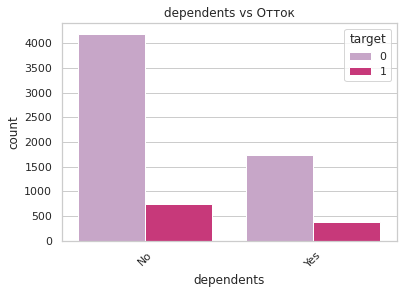

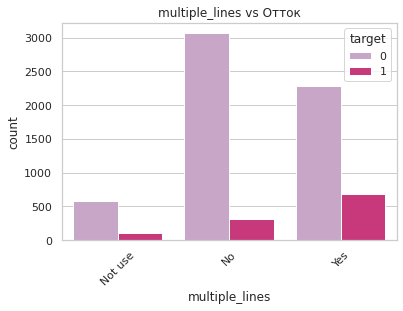

In [19]:
# Распределение по длительности контракта
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='contract_duration', hue='target',
             bins=30, kde=False, palette='PuRd')
plt.title("Распределение длительности контракта (мес.)")
plt.show()

# Boxplot для ежемесячных расходов по группам оттока
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='monthly_charges', data=df, palette='PuRd')
plt.title("Ежемесячные расходы vs Отток")
plt.xticks([0,1], ['Остался', 'Ушёл'])
plt.show()

# Гистограмма по типу интернета и оттоку
plt.figure(figsize=(6,4))
sns.countplot(x='internet_service', hue='target', data=df, palette='PuRd')
plt.title("Тип интернета vs Отток")
plt.show()

# Корреляция признаков

matrix_corr = df.phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'contract_duration'])

plt.figure(figsize=(12, 10))  
sns.heatmap(matrix_corr, annot=True, cmap="PuRd", fmt=".2f", linewidths=0.5) 
plt.title('Матрица корреляции')
plt.show()

# Анализ категориальных признаков
categorical_cols = [
    'type', 'payment_method', 'paperless_billing', 
    'gender', 'partner', 'dependents', 'multiple_lines'
]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='target', data=df, palette='PuRd')
    plt.title(f"{col} vs Отток")
    plt.xticks(rotation=45)
    plt.show()

**Выводы**

При повторной предобработке данных, после объединения таблиц, пропуски в данных были заменены на "Not use", так как фактически пользователи просто не пользуются услугами. Создан целевой признак, остался клиент или нет. Доля ушедших клиентов составляет 15%, наблюдается дисбаланс классов.

При проведении исследовательского анализа, были сделаны следующие выводы:
- клиенты с наименьшой длительностью контракта и с большим средними ежемесячными расходами, уходят чаще
- клиенты использующие тип интернета fiber optic также уходят чаще
- матрица корредяции показывает, что значительное количество параметров демонстрируют слабую корреляцию с целевым признаком
- пол клиента не влияет на отмену подписки
- наименьшее количество отмен подписок зафиксировано среди клиентов, получающих чеки на электронную почту, что может свидетельствовать о снижении уровня беспокойства у данной группы клиентов.
- абоненты подключенные к нескольким телефонным линиям имеют большую долю оттока
- абоненты имеющие партнера и не имеющие детей имеют юольший проент оттока.


## Подготовка данных ##
Выполните подготовку данных для обучения модели. Разделите данные на две выборки, при масштабировании и кодировании учитывайте особенности данных и моделей.

In [26]:
# разделяем данные на признаки и целевую переменную
features = df.drop('target', axis=1)
target = df['target']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=110825, stratify=target
)

# Определяем числовые и категориальные признаки
num_cols = ['monthly_charges', 'total_charges', 'contract_duration']
cat_cols = ['senior_citizen', 'type', 'paperless_billing', 'payment_method', 'gender', 'partner', 
            'dependents', 'internet_service', 'online_security', 'online_backup', 
            'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']


num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

**Выводы**

На этапе подготовки, данные разделены на обучающую и тестовую выборки. Определены числовые и категориальные признаки.Для приведения признаков к единому масштабу используется стандартизация (StandardScaler). Для кодирования категориальных переменных используется OneHotEncoding. 

## Обучение моделей машинного обучения ##
Обучите как минимум две модели. Хотя бы для одной из них подберите как минимум два гиперпараметра.

In [27]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=110825))
])

param_grid = [
    {
        'model': [LogisticRegression(max_iter=1000, random_state=110825)],
        'model__C': [0.1, 1, 5, 10]
    },
    {
        'model': [RandomForestClassifier(random_state=110825)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, None]
    },
    {
        'model': [GradientBoostingClassifier(random_state=110825)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    {
        'model': [XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=110825)],
        'model__n_estimators': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    {
        'model': [LGBMClassifier(random_state=110825)],
        'model__n_estimators': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [-1, 5, 10]
    },
    {
        'model': [CatBoostClassifier(verbose=0, random_state=110825)],
        'model__iterations': [200, 300],
        'model__learning_rate': [0.05, 0.1],
        'model__depth': [4, 6, 8]
    }
]

In [28]:
grid_search = GridSearchCV(
    pipe, param_grid, cv=3,
    scoring='roc_auc', n_jobs=-1, verbose=2
)
grid_search.fit(features_train, target_train)

print("\nЛучшая модель:", grid_search.best_estimator_)
print("Лучшие параметры:", grid_search.best_params_)
print(f"ROC-AUC на кросс-валидации: {grid_search.best_score_:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=0.1; total time=   0.4s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=0.1; total time=   0.5s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=0.1; total time=   0.7s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=1; total time=   1.0s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=1; total time=   1.0s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=1; total time=   0.9s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=5; total time=   0.9s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=5; total time=   1.0s
[CV] END model=LogisticRegression(max_iter=1000, random_state=110825), model__C=5; total time=   0.8s
[CV] END model

**Выводы**

Для обучения были выбраны и обучены модели:
- Логистическая регрессия
- Случайный лес
- Градиентный бустинг
- XGBoost
- LightGBM
- CatBoost
Для кажной модели были подобраны гиперпараметры. В качестве метрики качества моделей использовался ROC-AUC, поскольку она подходит для несбалансированных выборок.
Так, лучшую метрику ROC-AUC показала модель CatBoostClassifier и составляет 0,83.

## Выбор лучшей модели ##
Выберите лучшую модель и проверьте её качество на тестовой выборке.


In [29]:
# Оценка на тестовой выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(features_test)
y_pred_proba = best_model.predict_proba(features_test)[:,1]

test_auc = roc_auc_score(target_test, y_pred_proba)
print(f"\nROC-AUC на тестовой выборке: {test_auc:.2f}")
print("\nClassification Report:\n", classification_report(target_test, y_pred))


ROC-AUC на тестовой выборке: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1483
           1       0.85      0.48      0.61       275

    accuracy                           0.91      1758
   macro avg       0.88      0.73      0.78      1758
weighted avg       0.90      0.91      0.89      1758



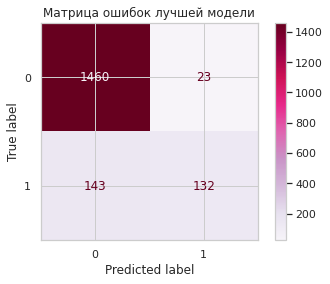

In [30]:
# Матрица ошибок
cm = confusion_matrix(target_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="PuRd")
plt.title("Матрица ошибок лучшей модели")
plt.show()

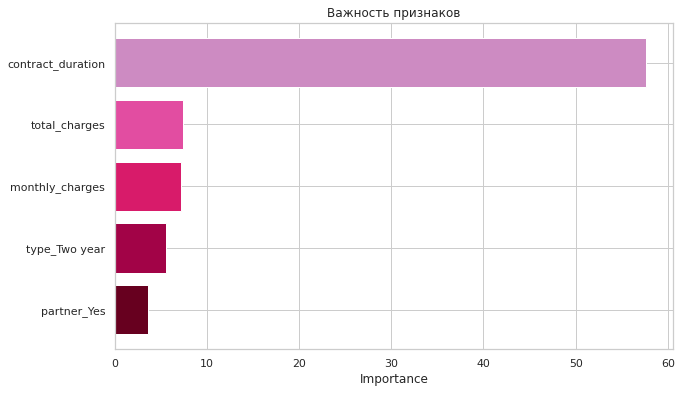

In [31]:
# Важность признаков
def get_feature_names(preprocessor, num_cols, cat_cols):
    feature_names = list(num_cols)

    cat_transformer = preprocessor.named_transformers_['cat']
    ohe = cat_transformer.named_steps['encoder']
    cat_feature_names = ohe.get_feature_names(cat_cols)
    feature_names.extend(cat_feature_names)

    return feature_names

# достаём обученный препроцессор и модель из пайплайна
fitted_preprocessor = best_model.named_steps['preprocessor']
model = best_model.named_steps['model']

# получаем имена признаков
feature_names = get_feature_names(fitted_preprocessor, num_cols, cat_cols)

# извлекаем важность признаков 
importances = model.feature_importances_ if hasattr(model, "feature_importances_") else model.coef_[0]

# создаём DataFrame 
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False).head(5)

# визуализация
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color=plt.cm.PuRd(np.linspace(0.4, 1, len(fi_df))))
plt.gca().invert_yaxis()
plt.title("Важность признаков")
plt.xlabel("Importance")
plt.show()

**Выводы**

Метрика качества на тестовых данных показала результат даже выше, чем на тренировочных 0.89, что соответствует критерию выполнения проекта.

Анализ матрицы ошибок:
- Модель правильно предсказала, что 1460 клиентов не уйдут.
- Модель неправильно предсказала, что 23 клиентов уйдут, когда на самом деле они не ушли. Это ошибка первого рода.
- Модель неправильно предсказала, что 143 клиентов не уйдут, когда на самом деле они ушли. Это ошибка второго рода. Это самое тревожное число в этой матрице, так как оно представляет клиентов, которые действительно ушли, но модель не увидела риска.
- Модель правильно предсказала, что 132 клиентов уйдут.

В целом модель хорошо предсказывает клиентов, которые не уйдут. При этом занчительное количество ложноотрицательных результатов, модель пропускает значительную часть клиентов, которые на самом деле собираются уйти, компания не сможет применить меры для удержания этих клиентов. Это связано с дисбалансом классов, для улучшения качества модели, необходимо большее количества данных.

## Общий вывод и рекомендации заказчику ##
Сделайте общий вывод о проделанной работе: опишите основные этапы работы, полученные результаты и дайте рекомендации для бизнеса.

В ходе проекта была решена задача прогнозирования оттока клиентов телеком-компании.

Этапы работы:

**Загрузка и исследование данных**
- Загрузили данные и посмотрели общую информацию
- Объединили данные о клиентах, тарифах, оплате и подключённых услугах.
- Выполнили проверку на пропуски, аномалии и дубликаты.
- Создали целевой признак target: 1 – клиент ушёл, 0 – остался.
- Построили графики распределений признаков.
- Выполнили корреляционный анализ
Выводы: более высокие monthly_charges и короткий срок контракта чаще связаны с оттоком.

**Подготовка данных**
- Данные разделены на обучающую (75%) и тестовую (25%) выборки.
- Числовые признаки были масштабированы, пропуски заменены медианой.
- Категориальные признаки закодированы методом OneHotEncoding.

**Обучение моделей и выбор лучшей**

Были протестированы несколько моделей: логистическая регрессия, случайный лес, XGBoost, LightGBM, CatBoost. Для каждой подбирались гиперпараметры и по результатам  кросс-валидации лучшей оказалась модель CatBoostClassifier. На тестовой выборке её качество составило ROC-AUC  0.89. Построена матрица ошибок: модель лучше предсказывает «остальных» клиентов, но часть ушедших всё ещё классифицируется неверно. Важнейшие признаки: длительность контракта, общие расходы и ежемесячные.

***Рекомендации для бизнеса:***

Необходимо сосредоточиться на клиентах с помесячной оплатой и стимулировать их переходить на долгосрочные контракты с помощью различных акций и бонусов.

Высокие ежемесячные платежи повышают вероятность оттока. Следует реализовать персональные скидки для клиентов с высокими ежемесячными расходами.